# Lab 3: EDA on Chipotle Orders

Today, we look at what people order at Chipotle. Some example questions we are interested in are:
- How much do people spend on average at Chipotle?
- Do people prefer bowls or burritos?
- What percentage of people order drinks?
- ...

In [15]:
# read in necessary packages and data
library(tidyverse)
df <- read.csv("chipotle.csv", stringsAsFactors = F)
df$X <- NULL

In [2]:
summary(df)

    order_id         quantity       item_name         choice_description
 Min.   :   1.0   Min.   : 1.000   Length:4622        Length:4622       
 1st Qu.: 477.2   1st Qu.: 1.000   Class :character   Class :character  
 Median : 926.0   Median : 1.000   Mode  :character   Mode  :character  
 Mean   : 927.3   Mean   : 1.076                                        
 3rd Qu.:1393.0   3rd Qu.: 1.000                                        
 Max.   :1834.0   Max.   :15.000                                        
  item_price       
 Length:4622       
 Class :character  
 Mode  :character  
                   
                   
                   

### Q1: what are the top 5 most popular items? (let's assume item_name are well-maintained, i.e., chicken bowl won't be listed as both Chicken Bowl and chicken bowl)

In [9]:
# top_n(count(df, item_name), 5)  %>% arrange(desc(n))

df %>% group_by(item_name) %>% summarise(counts = n()) %>% arrange(desc(counts))

item_name,counts
<chr>,<int>
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301
Chips,211
Steak Bowl,211
Bottled Water,162
Chicken Soft Tacos,115


### Q2: item_price is strings right now. Can we remove the dollar sign and convert it to numerical?

In [17]:
# df = df %>%
#         mutate(item_price = as.numeric(str_extract(item_price, "([0-9]+).*$")))

# ?substring
df <- df %>% mutate(item_price = as.numeric(substring(item_price,2)))
head(df)

order_id,quantity,item_name,choice_description,item_price
<int>,<int>,<chr>,<chr>,<dbl>
1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,Izze,[Clementine],3.39
1,1,Nantucket Nectar,[Apple],3.39
1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98


### Q3: Construct a table where for each item, we have amount sold, total revenue, max price sold, min price sold, mean price sold; arrange in decreasing order of amount sold.

I have done this for you, and my solution is:

In [18]:
pricetable <- df %>% group_by(item_name) %>% 
    summarise(revenue = sum(item_price), 
              itemsold = n(),
              meanprice = mean(item_price),
              maxprice = max(item_price),                       
              minprice = min(item_price)) %>% 
    arrange(desc(itemsold))
head(pricetable)

item_name,revenue,itemsold,meanprice,maxprice,minprice
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Chicken Bowl,7342.73,726,10.113953,32.94,8.19
Chicken Burrito,5575.82,553,10.082857,35.00,8.19
Chips and Guacamole,2201.04,479,4.595073,17.80,3.89
Steak Burrito,3851.43,368,10.465842,27.75,8.69
Canned Soft Drink,438.75,301,1.457641,5.00,1.25
Chips,494.34,211,2.342844,6.45,1.99


Wait! how can a chicken bowl be 32.94? Double chicken chicken bowl is only 10 bucks! What happened?

### Take a look at the row in df where chicken bowl costed 32.94. Is my code for Q3 correct? If not, what's the correct one. Also check if your code for Q1 is correct.

In [6]:
# select the row where chicken bowl costs 32.94

df %>% filter(item_name == "Chicken Bowl", item_price == 32.94)

order_id,quantity,item_name,choice_description,item_price
178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, Fajita Veggies, Cheese, Guacamole, Lettuce]]",32.94


In [7]:
# correct the code in Q3.

pricetable <- df %>% group_by(item_name) %>% 
    summarise(revenue = sum(item_price), 
              itemsold = sum(quantity),
              meanprice = mean(item_price/quantity),
              maxprice = max(item_price/quantity),                       
              minprice = min(item_price/quantity)) %>% 
    arrange(desc(itemsold))
head(pricetable)

item_name,revenue,itemsold,meanprice,maxprice,minprice
Chicken Bowl,7342.73,761,9.657727,11.25,8.19
Chicken Burrito,5575.82,591,9.475949,11.25,8.19
Chips and Guacamole,2201.04,506,4.345616,4.45,3.89
Steak Burrito,3851.43,386,9.993424,11.75,8.69
Canned Soft Drink,438.75,351,1.250000,1.25,1.25
Chips,494.34,230,2.149242,2.15,1.99


### Q4: What's the total price for each order? Plot a histogram of how much each order spends?

In [19]:
# table for the total price of each order 
total_price <- df %>%
                group_by(order_id) %>%
                    summarise(totalprice = sum(item_price))
total_price

order_id,totalprice
<int>,<dbl>
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
6,17.50
7,15.70
8,10.88
9,10.67


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


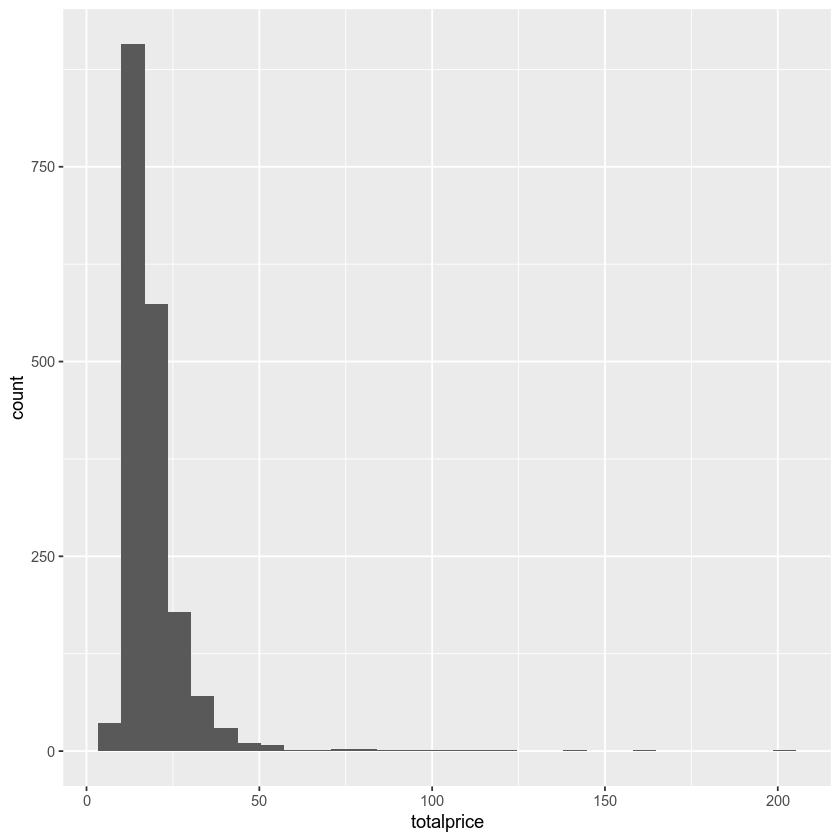

In [9]:
# Plot that

ggplot(total_price, aes(x=totalprice)) + 
    geom_histogram() 

Can you locate your order habit in the plot above? I think the plot will be more informative if we look at only order below 20 bucks and select a smaller binwidth.

### Q5: Change the plot in Q4 such that we look only at orders below 20 and use a smaller binwidth.

Warning message:
“Removed 566 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

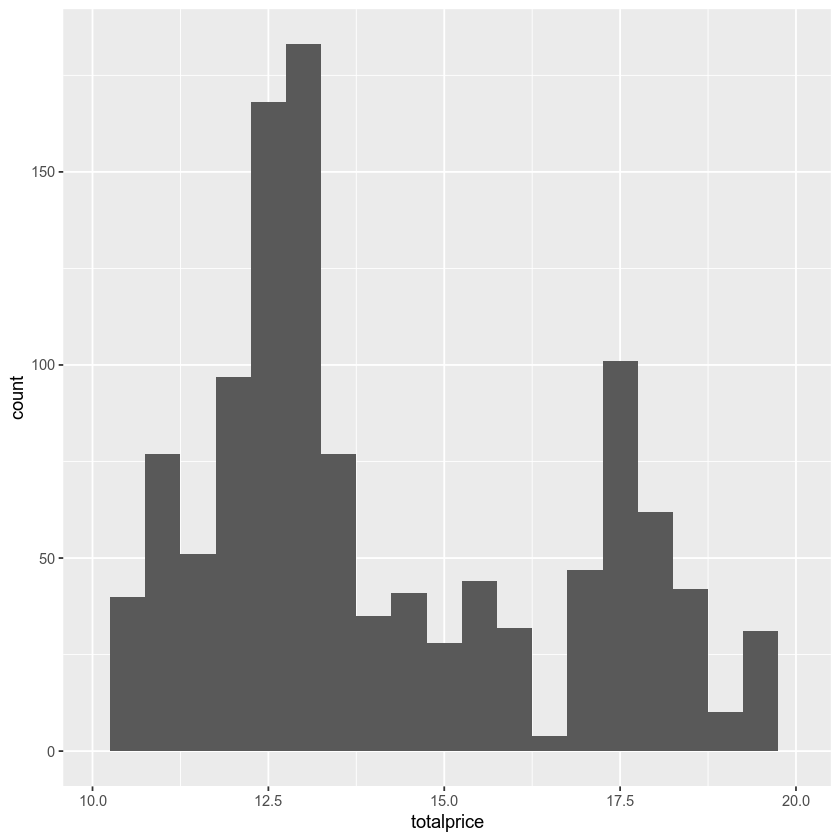

In [10]:
ggplot(total_price, aes(x=totalprice)) + 
    geom_histogram(binwidth = 0.5) + xlim(min(total_price$totalprice), 20)

How does your spending habits at Chipotle compare to those who are in the dataset?

### Q6: Are bowls more popular or burritos more popular? Create a bar plot where the y axis is the amount sold, and the x axis contains one bar for bowl, one bar for burrito. 
Hint: You can use `ifelse` function

In [23]:
bORb = df %>% mutate(burritoORbowl =
                   ifelse(grepl(pattern = "Bowl", x = df$item_name), "Bowl",
                          ifelse(grepl(pattern = "Burrito", x = df$item_name), "Burrito",
                                 NA))) %>%
    group_by(burritoORbowl) %>%
    summarise(total = sum(quantity)) %>% 
    drop_na()

bORb

burritoORbowl,total
<chr>,<int>
Bowl,1398
Burrito,1231


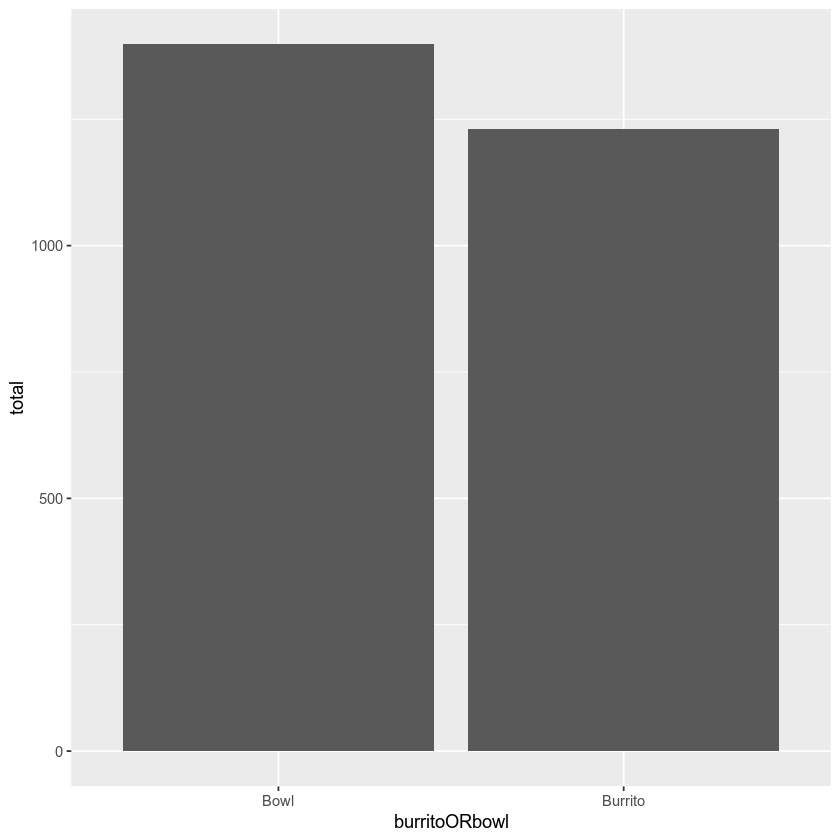

In [12]:
ggplot(data = bORb, aes(burritoORbowl, total)) + 
    geom_col()

### Q7: What percentage of orders contain at least one drink of any kind?

In [5]:
# df %>% 
# filter(str_detect(item_name, "Drink")) %>%
# select(order_id) %>% distinct() %>% summarise(n())

df %>% 
mutate(DrinkOrNot = grepl('Drink', item_name)) %>%
filter(DrinkOrNot == TRUE) %>%
select(order_id) %>% distinct() %>% summarise(n())

n()
<int>
330


In [6]:
nrow(distinct(df, order_id))

[1] 1834

In [7]:
paste(100*330/1834,"%")

[1] "17.9934569247546 %"

### Bonus Question: Suppose for any non drink item sold, 20% of the price is profit, for any drink sold, 85% is profit. According to our data, what percentage of total profit comes from drinks?

In [16]:
a = df %>%
        filter(str_detect(item_name, "Drink")) %>% summarise(sum(item_price))

In [17]:
b = df %>%
        filter(str_detect(item_name, "Drink", negate = TRUE)) %>% 
            summarise(sum(item_price))

In [18]:
paste(100*(a*0.85)/(b*0.2+a*0.85),"%")

[1] "9.11855722016163 %"